<a href="https://colab.research.google.com/github/jhlopesalves/Datacamp-Notebooks/blob/main/Python/Exploratory%20Data%20Analysis/exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [217]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [218]:
# Ensure the data directory exists
if not os.path.exists('data'):
    os.makedirs('data')

# List of raw-GitHub URLs to download
urls = [
    "https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Exploratory%20Data%20Analysis/data/clean_books.csv",
    "https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Exploratory%20Data%20Analysis/data/clean_unemployment.csv",
    "https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Exploratory%20Data%20Analysis/data/divorce.csv",
    "https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Exploratory%20Data%20Analysis/data/ds_salaries_clean.csv",
    "https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Exploratory%20Data%20Analysis/data/ds_salaries.csv",
    "https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Exploratory%20Data%20Analysis/data/planes.csv",
]

# Run wget in quiet mode for each URL
for url in urls:
    # -q suppresses all output; -P directs output into 'data/' directory
    !wget -q -P data/ "{url}"

# Single success message
print("All files downloaded successfully.")


'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,'wget' is not recognized as an internal or external command,

All files downloaded successfully.



operable program or batch file.


## Getting to Know a Dataset
What's the best way to approach a new dataset? Learn to validate and summarize categorical and numerical data and create Seaborn visualizations to communicate your findings.




### Initial exploration
The process of reviewing and cleaning data
to...
- derive insights
- generate hypotheses

A first look with `.head()`

In [219]:
books = pd.read_csv("data/clean_books.csv")
books.head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019,Childrens


Gathering more `.info()`

In [220]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  350 non-null    float64
 3   year    350 non-null    int64  
 4   genre   350 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.8+ KB


A closer look at categorical columns

In [221]:
books.value_counts("genre")

genre
Non Fiction    179
Fiction        131
Childrens       40
Name: count, dtype: int64

`.describe()` numerical columns


In [222]:
books.describe()

,rating,year
count,350.000000,350.000000
mean,4.608571,2013.508571
std,0.226941,3.284711
min,3.300000,2009.000000
25%,4.500000,2010.000000
50%,4.600000,2013.000000
75%,4.800000,2016.000000
max,4.900000,2019.000000


### Visualizing numerical dta with Seaborn

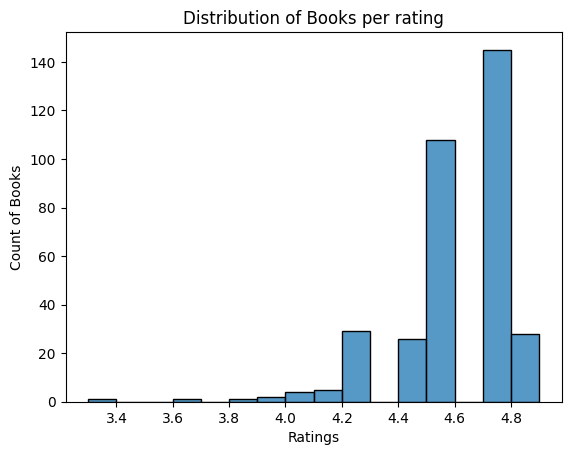

In [223]:
# Create a histogram of ratings count
fig, ax = plt.subplots()
sns.histplot(data=books, x="rating", binwidth=.1)
ax.set(xlabel="Ratings",
       ylabel="Count of Books",
       title="Distribution of Books per rating")

plt.show()

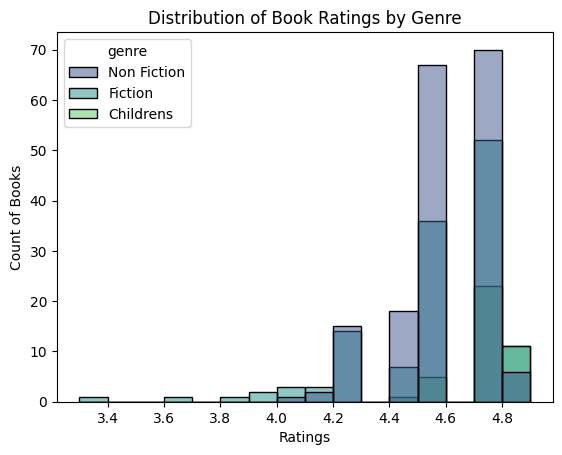

In [224]:
# Create a histogram of ratings colored by genre
fig, ax = plt.subplots()

sns.histplot(data=books, x="rating", hue="genre", binwidth=.1, palette="viridis")

# Set the labels and title for the plot
ax.set(xlabel="Ratings",
       ylabel="Count of Books",
       title="Distribution of Book Ratings by Genre")

plt.show()

In [225]:
books.groupby("genre").mean(numeric_only=True)

,rating,year
genre,,
Childrens,4.780000,2015.075000
Fiction,4.570229,2013.022901
Non Fiction,4.598324,2013.513966


In [226]:
books.select_dtypes(include=np.number).agg(["mean", "std"])

,rating,year
mean,4.608571,2013.508571
std,0.226941,3.284711


In [227]:
books.select_dtypes(include=np.number).agg({"rating": ["mean", "std"], "year":["median"]})

,rating,year
mean,4.608571,NaN
std,0.226941,NaN
median,NaN,2013.0


In [228]:
books.groupby("genre").agg(
    mean_rating=("rating", "mean"),
    std_rating=("rating", "std"),
    median_year=("year", "median")
)

,mean_rating,std_rating,median_year
genre,,,
Childrens,4.780000,0.122370,2015.0
Fiction,4.570229,0.281123,2013.0
Non Fiction,4.598324,0.179411,2013.0


### Functions for initial exploration
You are researching unemployment rates worldwide and have been given a new dataset to work with. The data has been saved and loaded for you as a pandas DataFrame called unemployment. You've never seen the data before, so your first task is to use a few pandas functions to learn about this new data.

In [229]:
unemployment = pd.read_csv("data/clean_unemployment.csv")

In [230]:
# Print the first five rows of unemployment
display(unemployment.head())

,country_code,country_name,continent,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AFG,Afghanistan,Asia,11.35,11.05,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
1,AGO,Angola,Africa,9.43,7.36,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
2,ALB,Albania,Europe,14.09,13.48,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
3,ARE,United Arab Emirates,Asia,2.48,2.30,2.18,2.04,1.91,1.77,1.64,2.46,2.35,2.23,3.19,3.36
4,ARG,Argentina,South America,7.71,7.18,7.22,7.10,7.27,7.52,8.11,8.35,9.22,9.84,11.46,10.90


In [231]:
# Use a pandas function to print a summary of column non-missing values and data types from the unemployment DataFrame.
print(unemployment.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  182 non-null    object 
 1   country_name  182 non-null    object 
 2   continent     177 non-null    object 
 3   2010          182 non-null    float64
 4   2011          182 non-null    float64
 5   2012          182 non-null    float64
 6   2013          182 non-null    float64
 7   2014          182 non-null    float64
 8   2015          182 non-null    float64
 9   2016          182 non-null    float64
 10  2017          182 non-null    float64
 11  2018          182 non-null    float64
 12  2019          182 non-null    float64
 13  2020          182 non-null    float64
 14  2021          182 non-null    float64
dtypes: float64(12), object(3)
memory usage: 21.5+ KB
None


In [232]:
# Print the summary statistics (count, mean, standard deviation, min, max, and quartile values) of each numerical column in unemployment.
display(unemployment.describe())

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,8.409286,8.315440,8.317967,8.344780,8.179670,8.058901,7.925879,7.668626,7.426429,7.243736,8.420934,8.390879
std,6.248887,6.266795,6.367270,6.416041,6.284241,6.161170,6.045439,5.902152,5.818915,5.696573,6.040915,6.067192
min,0.450000,0.320000,0.480000,0.250000,0.200000,0.170000,0.150000,0.140000,0.110000,0.100000,0.210000,0.260000
25%,4.015000,3.775000,3.742500,3.692500,3.625000,3.662500,3.800000,3.690000,3.625000,3.487500,4.285000,4.335000
50%,6.965000,6.805000,6.690000,6.395000,6.450000,6.170000,5.925000,5.650000,5.375000,5.240000,6.695000,6.425000
75%,10.957500,11.045000,11.285000,11.310000,10.695000,10.215000,10.245000,10.315000,9.257500,9.445000,11.155000,10.840000
max,32.020000,31.380000,31.020000,29.000000,28.030000,27.690000,26.540000,27.040000,26.910000,28.470000,29.220000,33.560000


In [233]:
# Use a method to count the values associated with each continent in the unemployment DataFrame.
print(unemployment["continent"].value_counts())

continent
Africa           53
Asia             47
Europe           39
North America    18
South America    12
Oceania           8
Name: count, dtype: int64


### Global unemployment in 2021
It's time to explore some of the numerical data in unemployment! What was typical unemployment in a given year? What was the minimum and maximum unemployment rate, and what did the distribution of the unemployment rates look like across the world? A histogram is a great way to get a sense of the answers to these questions.

Your task in this exercise is to create a histogram showing the distribution of global unemployment rates in 2021.

In [234]:
unemployment.head()

,country_code,country_name,continent,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AFG,Afghanistan,Asia,11.35,11.05,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
1,AGO,Angola,Africa,9.43,7.36,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
2,ALB,Albania,Europe,14.09,13.48,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
3,ARE,United Arab Emirates,Asia,2.48,2.30,2.18,2.04,1.91,1.77,1.64,2.46,2.35,2.23,3.19,3.36
4,ARG,Argentina,South America,7.71,7.18,7.22,7.10,7.27,7.52,8.11,8.35,9.22,9.84,11.46,10.90


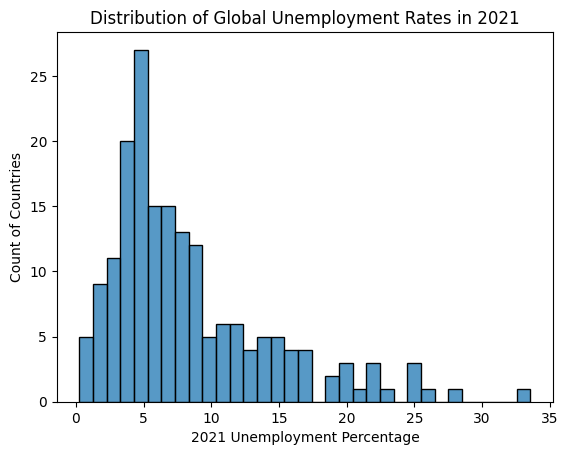

In [235]:
# Create a histogram of the distribution of 2021 unemployment percentages across all countries in unemployment; show a full percentage point in each bin.
fig, ax = plt.subplots()
sns.histplot(data=unemployment, x="2021", binwidth=1)
ax.set(title="Distribution of Global Unemployment Rates in 2021",
       xlabel="2021 Unemployment Percentage",
       ylabel="Count of Countries")

plt.show()

### Data Validation

Validating data types


In [236]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  350 non-null    float64
 3   year    350 non-null    int64  
 4   genre   350 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.8+ KB


In [237]:
books.dtypes

name       object
author     object
rating    float64
year        int64
genre      object
dtype: object

### Updating data types

| Type       | Python Name |
|------------|-------------|
| String     | `str`       |
| Integer    | `int`       |
| Float      | `float`     |
| Dictionary | `dict`      |
| List       | `list`      |
| Boolean    | `bool`      |


In [238]:
books ["year"] = books ["year"].astype(int)
books.dtypes

name       object
author     object
rating    float64
year        int64
genre      object
dtype: object

### Validating categorical data

In [239]:
books ["genre"].isin(["Fiction", "Non Fiction"])

0       True
1       True
2       True
3       True
4      False
       ...  
345     True
346     True
347     True
348     True
349    False
Name: genre, Length: 350, dtype: bool

In [240]:
~books ["genre"].isin(["Fiction", "Non Fiction"])

0      False
1      False
2      False
3      False
4       True
       ...  
345    False
346    False
347    False
348    False
349     True
Name: genre, Length: 350, dtype: bool

In [241]:
books [books["genre"].isin(["Fiction", "Non Fiction"])].head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,2011,Fiction


In [242]:
books.select_dtypes("number").head()

,rating,year
0,4.7,2016
1,4.6,2011
2,4.7,2018
3,4.7,2017
4,4.8,2019


### Validating numerical data


In [243]:
print(f"Lowest year: {books['year'].min()}, Highest year: {books['year'].max()}")

Lowest year: 2009, Highest year: 2019


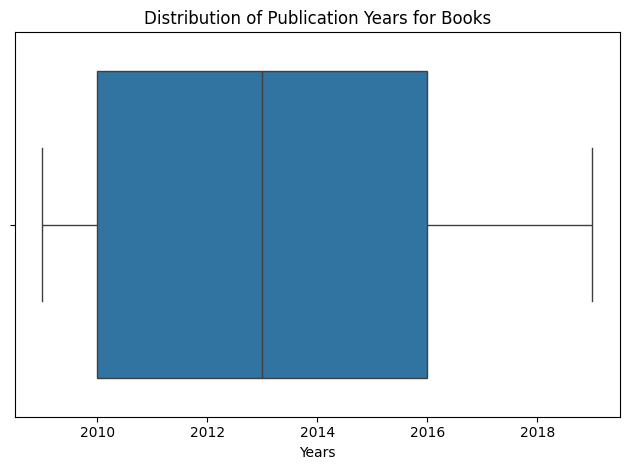

In [244]:
fig, ax = plt.subplots()
sns.boxplot(data=books, x="year")
ax.set(title="Distribution of Publication Years for Books",
       xlabel="Years")
plt.tight_layout()
plt.show()

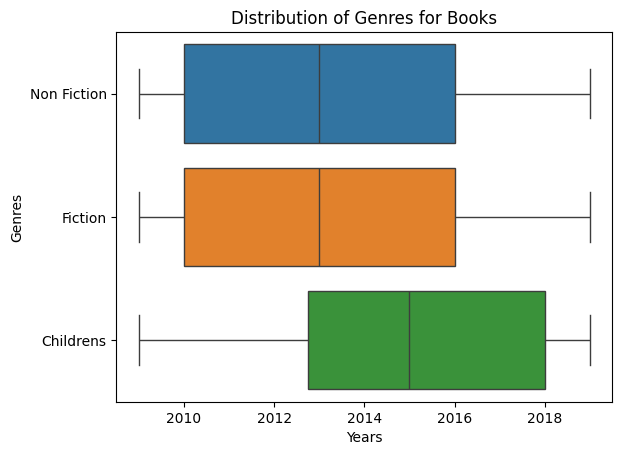

In [245]:
fig, ax = plt.subplots()
sns.boxplot(data=books, x="year", y="genre", hue="genre")
ax.set(xlabel="Years", ylabel="Genres", title="Distribution of Genres for Books")
plt.show()

### Data summarization
#### Exploring groups of data
- `.groupby()` groups data by category
- Aggregating function indicates how to summarize grouped data


In [246]:
# Calculate the mean of numeric columns after grouping by genre
display(books.groupby("genre")[["rating", "year"]].mean())

,rating,year
genre,,
Childrens,4.780000,2015.075000
Fiction,4.570229,2013.022901
Non Fiction,4.598324,2013.513966


### Aggregating functions
- Sum:`.sum()`
- Count: `.count()`
- Minimum: `.min()`
- Maximum: `.max()`
- Variance: `.var()`
- Standard deviation:`.std()`

### Aggregating ungrouped data
`.agg()` applies aggregating functions across a DataFrame

In [247]:
# Select only columns with numeric data types (integers and floats).
# np.number is a shorthand for all numeric dtypes.
numeric_books = books.select_dtypes(include=np.number)

# Apply multiple aggregation functions ('mean' and 'std') to the selected numeric columns.
display(numeric_books.agg(["mean", "std"]))

,rating,year
mean,4.608571,2013.508571
std,0.226941,3.284711


### Specifying aggregations for columns


In [248]:
books.agg({"rating": ["mean", "std"], "year": ["median"]})

,rating,year
mean,4.608571,NaN
std,0.226941,NaN
median,NaN,2013.0


### Named summary columns


In [249]:
# Group the books DataFrame by the 'genre' column.
books.groupby("genre").agg(
    # Calculate the mean of the 'rating' column and name the resulting column 'mean_rating'.
    mean_rating=("rating", "mean"),
    # Calculate the standard deviation of the 'rating' column and name the resulting column 'std_rating'.
    std_rating=("rating", "std"),
    # Calculate the median of the 'year' column and name the resulting column 'median_year'.
    median_year=("year", "median")
)

,mean_rating,std_rating,median_year
genre,,,
Childrens,4.780000,0.122370,2015.0
Fiction,4.570229,0.281123,2013.0
Non Fiction,4.598324,0.179411,2013.0


### Visualizing categorical summaries


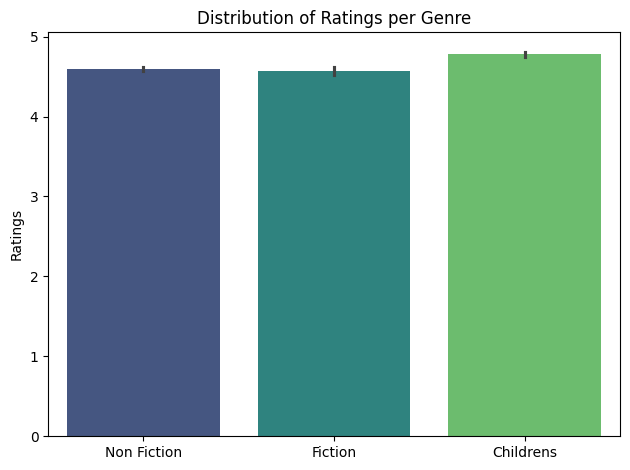

In [250]:
fig, ax = plt.subplots()
sns.barplot(data=books, x="genre", y="rating", hue="genre", palette="viridis")
ax.set(title="Distribution of Ratings per Genre",
       xlabel="",
       ylabel="Ratings")
plt.tight_layout()
plt.show()

### Summaries with .groupby() and .agg()
In this exercise, you'll explore the means and standard deviations of the yearly unemployment data. First, you'll find means and standard deviations regardless of the continent to observe worldwide unemployment trends. Then, you'll check unemployment trends broken down by continent.

In [251]:
# Print yearly mean and standard deviation grouped by continent
display(unemployment.select_dtypes(include=np.number).agg(["mean", "std"]))

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
mean,8.409286,8.315440,8.317967,8.344780,8.179670,8.058901,7.925879,7.668626,7.426429,7.243736,8.420934,8.390879
std,6.248887,6.266795,6.367270,6.416041,6.284241,6.161170,6.045439,5.902152,5.818915,5.696573,6.040915,6.067192


In [252]:
# Print yearly mean and standard deviation grouped by continent
year_cols = [col for col in unemployment.columns if col.isdigit()]
display(unemployment.groupby("continent")[year_cols].agg(["mean", "std"]))


2010                 2011                 2012            \
                    mean       std       mean       std       mean       std   
continent                                                                      
Africa          9.343585  7.411259   9.369245  7.401556   9.240755  7.264542   
Asia            6.240638  5.146175   5.942128  4.779575   5.835319  4.756904   
Europe         11.008205  6.392063  10.947949  6.539538  11.325641  7.003527   
North America   8.663333  5.115805   8.563333  5.377041   8.448889  5.495819   
Oceania         3.622500  2.054721   3.647500  2.008466   4.103750  2.723118   
South America   6.870833  2.807058   6.518333  2.801577   6.410833  2.936508   

                    2013                 2014            ...      2017  \
                    mean       std       mean       std  ...      mean   
continent                                                ...             
Africa          9.132453  7.309285   9.121321  7.291359  ...  9.284528   
Asia            5.852128  4.668405   5.853191  4.681301  ...  6.171277   
Europe         11.466667  6.969209  10.971282  6.759765  ...  8.359744   
North America   8.840556  6.081829   8.512222  5.801927  ...  7.391111   
Oceania         3.980000  2.640119   3.976250  2.659205  ...  3.872500   
South America   6.335000  2.808780   6.347500  2.834332  ...  7.281667   

                             2018                2019                 2020  \
                    std      mean       std      mean       std       mean   
continent                                                                    
Africa         7.407620  9.237925  7.358425  9.264340  7.455293  10.307736   
Asia           5.277201  6.090213  5.409128  5.949149  5.254008   7.012340   
Europe         5.177845  7.427436  4.738206  6.764359  4.124734   7.470513   
North America  5.326446  7.281111  5.253180  7.095000  4.770490   9.297778   
Oceania        2.492834  3.851250  2.455893  3.773750  2.369068   4.273750   
South America  3.398994  7.496667  3.408856  7.719167  3.379845  10.275000   

                              2021            
                    std       mean       std  
continent                                     
Africa         7.928166  10.473585  8.131636  
Asia           5.699609   6.906170  5.414745  
Europe         4.071218   7.414872  3.947825  
North America  4.963045   9.155000  5.076482  
Oceania        2.617490   4.280000  2.671522  
South America  3.411263   9.924167  3.611624  

[6 rows x 24 columns]

### Named aggregations
You've seen how `.groupby()` and `.agg()` can be combined to show summaries across categories. Sometimes, it's helpful to name new columns when aggregating so that it's clear in the code output what aggregations are being applied and where.

Your task is to create a DataFrame called `continent_summary` which shows a row for each continent. The DataFrame columns will contain the mean unemployment rate for each continent in 2021 as well as the standard deviation of the 2021 employment rate. And of course, you'll rename the columns so that their contents are clear!

In [253]:

continent_summary = unemployment.groupby("continent").agg(
    # Create the mean_rate_2021 column
    mean_rate_2021=("2021", "mean"),
    # Create the std_rate_2021 column
    std_rate_2021=("2021", "mean")
)
display(continent_summary)

,mean_rate_2021,std_rate_2021
continent,,
Africa,10.473585,10.473585
Asia,6.906170,6.906170
Europe,7.414872,7.414872
North America,9.155000,9.155000
Oceania,4.280000,4.280000
South America,9.924167,9.924167


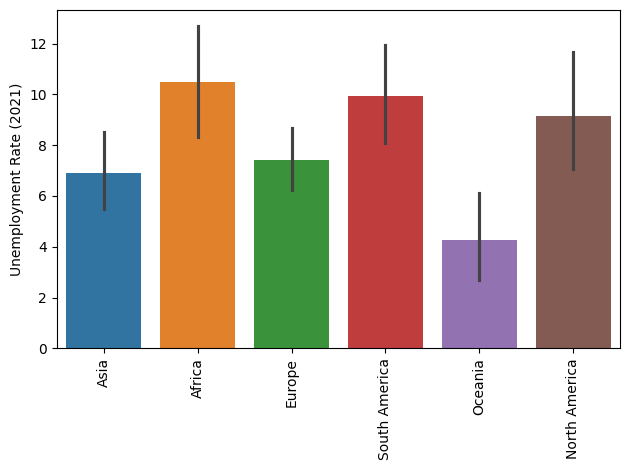

In [254]:
# Create a bar plot of continents and their average unemployment
fig, ax = plt.subplots()
sns.barplot(x="continent", y="2021", data=unemployment, hue="continent", legend=False)
ax.set(xlabel="",
       ylabel="Unemployment Rate (2021)")

ax.tick_params(axis='x', labelrotation=90)
plt.tight_layout()
plt.show()

## Data Cleaning and Imputation
Exploring and analyzing data often means dealing with missing values, incorrect data types, and outliers. In this chapter, you’ll learn techniques to handle these issues and streamline your EDA processes!



In [255]:
planes = pd.read_csv("data/planes.csv")

### Dealing with missing data
It is important to deal with missing data before starting your analysis.

One approach is to drop missing values if they account for a small proportion, typically five percent, of your data.

Working with a dataset on plane ticket prices, stored as a pandas DataFrame called planes, you'll need to count the number of missing values across all columns, calculate five percent of all values, use this threshold to remove observations, and check how many missing values remain in the dataset.

In [256]:
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0


In [257]:
# Count the number of missing values in each column
display(planes.isna().sum())

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64

In [258]:
# Find the five percent threshold
threshold = len(planes) * 0.05
display(threshold)

533.0

In [259]:
# Create a filter
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]
display(cols_to_drop)

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops'],
      dtype='object')

In [260]:
# Drop missing values for columns below the threshold
planes.dropna(subset=cols_to_drop, inplace=True)

In [261]:
# Check how many missing values remain in each column
display(planes.isna().sum())

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64

### Strategies for remaining missing data
The five percent rule has worked nicely for your planes dataset, eliminating missing values from nine out of 11 columns!

Now, you need to decide what to do with the `"Additional_Info"` and `"Price"` columns, which are missing 300 and 368 values respectively.

You'll first take a look at what `"Additional_Info"` contains, then visualize the price of plane tickets by different airlines.

In [262]:
display(planes["Additional_Info"].value_counts())

Additional_Info
No info                         6399
In-flight meal not included     1525
No check-in baggage included     258
1 Long layover                    14
Change airports                    7
No Info                            2
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

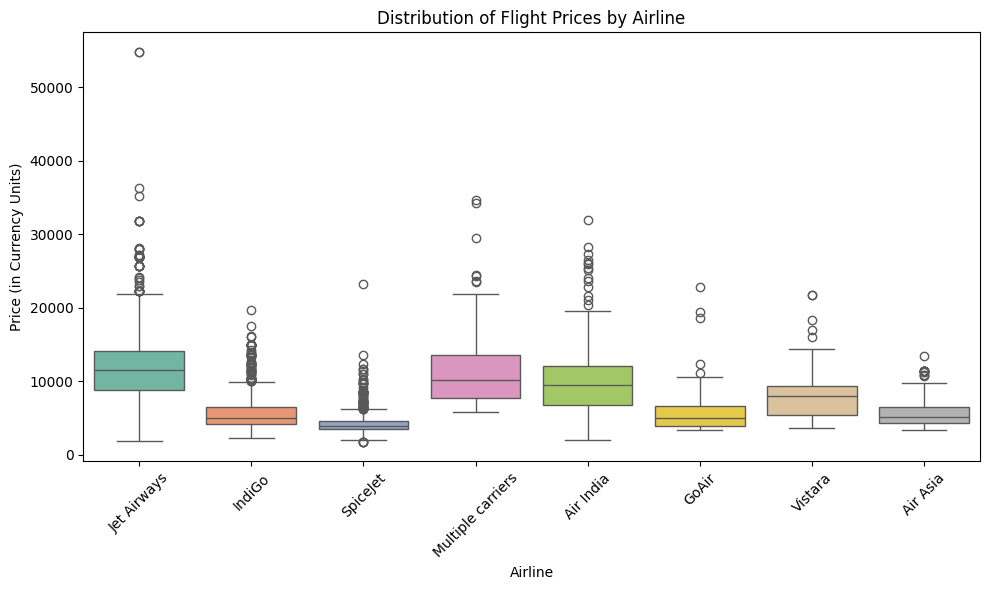

In [263]:
# Create a box plot of Price by Airline
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(data=planes, x="Airline", y="Price", hue="Airline", palette="Set2")
ax.set(title="Distribution of Flight Prices by Airline",
       xlabel="Airline",
       ylabel="Price (in Currency Units)")
# Rotate x-axis labels using ax.tick_params
ax.tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()

#### Question
How should you deal with the missing values in `"Additional_Info"` and `"Price"`?

**Possible Answers**

1) Remove the `"Additional_Info"` column and impute the mean for missing values of `"Price"`.

2) Remove "No info" values from `"Additional_Info"` and impute the median for missing values of `"Price"`.

3) Remove the "Additional_Info" column and impute the mean by `"Airline"` for missing values of `"Price"`.

4) Remove the "Additional_Info" column and impute the median by `"Airline"` for missing values of `"Price"`.

C:\Users\lerea\AppData\Local\Temp\ipykernel_21500\3056650141.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), ha='right')


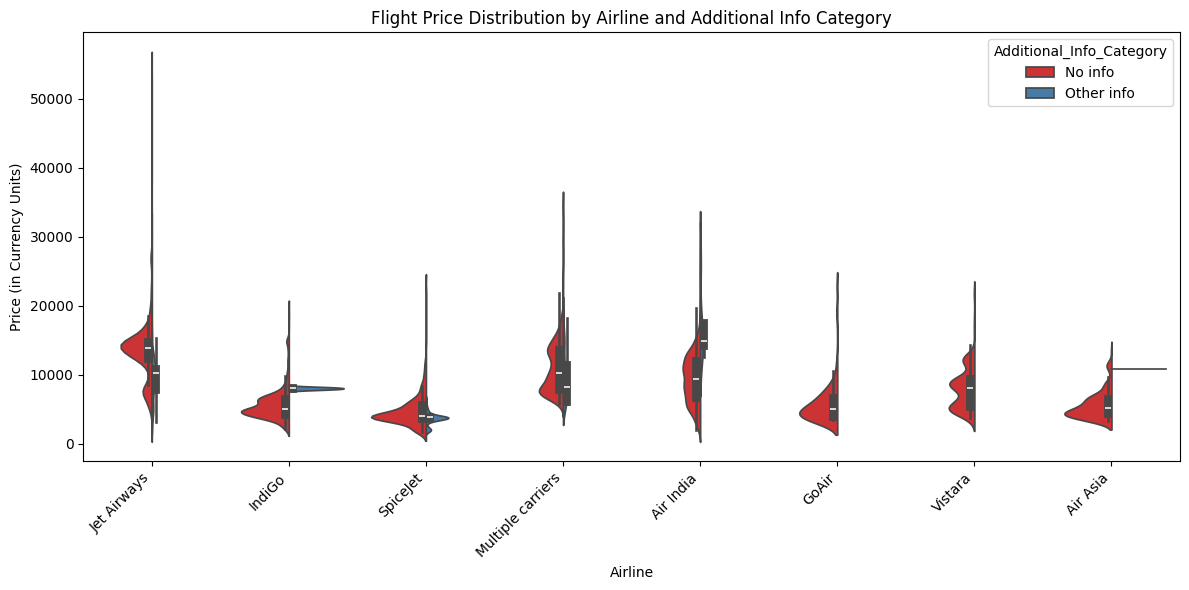

In [264]:
# Categorize 'Additional_Info' into 'No info' and 'Other info'
planes['Additional_Info_Category'] = planes['Additional_Info'].apply(lambda x: 'No info' if pd.isna(x) or x == 'No info' else 'Other info')

# Create a violin plot of Price by Airline, split by Additional_Info_Category
fig, ax = plt.subplots(figsize=(12, 6))
sns.violinplot(data=planes, x='Airline', y='Price', hue='Additional_Info_Category', split=True, palette="Set1", ax=ax)
ax.set(title="Flight Price Distribution by Airline and Additional Info Category",
       xlabel="Airline",
       ylabel="Price (in Currency Units)")
# Rotate x-axis labels for better readability using OOP approach
ax.tick_params(axis='x', labelrotation=45)
ax.set_xticklabels(ax.get_xticklabels(), ha='right')
plt.tight_layout()
plt.show()

### Imputing missing plane prices
Now there's just one column with missing values left!

You've removed the `"Additional_Info"` column from planes—the last step is to impute the missing data in the `"Price"` column of the dataset.

As a reminder, you generated this boxplot, which suggested that imputing the median price based on the `"Airline"` is a solid approach!

In [265]:
planes.dropna(subset="Additional_Info", inplace=True)

In [266]:
# Calculate median plane ticket prices by Airline after dropping rows with missing 'Additional_Info'
airline_prices = planes.groupby("Airline")["Price"].median()
display(airline_prices)

Airline
Air Asia              5177.0
Air India             9443.0
GoAir                 4959.0
IndiGo                5054.0
Jet Airways          11507.0
Multiple carriers    10010.0
SpiceJet              3873.0
Vistara               8085.0
Name: Price, dtype: float64

In [267]:
# Convert to a dictionary
prices_dict = airline_prices.to_dict()
display(prices_dict)

{'Air Asia': 5177.0,
 'Air India': 9443.0,
 'GoAir': 4959.0,
 'IndiGo': 5054.0,
 'Jet Airways': 11507.0,
 'Multiple carriers': 10010.0,
 'SpiceJet': 3873.0,
 'Vistara': 8085.0}

In [268]:
# Map the dictionary to missing values of Price by Airline
planes["Price"] = planes["Price"].fillna(planes["Airline"].map(prices_dict))

# Check for missing values
display(planes.isna().sum())

Airline                     0
Date_of_Journey             0
Source                      0
Destination                 0
Route                       0
Dep_Time                    0
Arrival_Time                0
Duration                    0
Total_Stops                 0
Additional_Info             0
Price                       0
Additional_Info_Category    0
dtype: int64

In [269]:
salaries = pd.read_csv("data/ds_salaries_clean.csv")
#salaries = pd.read_csv("data/ds_salaries.csv")

In [270]:
# salaries = salaries.rename(columns={"experience_level": "Experience", "employment_type":"Employment_Status", "job_title": "Designation", "company_size":"Company_Size", "salary": "Salary", "employee_residence": "Employee_Location"})

In [271]:
salaries.head()

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0
2,2020,Big Data Engineer,Senior,FT,GB,M,50,104100.0
3,2020,Product Data Analyst,Mid,FT,HN,S,0,19097.0
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,143225.0


In [272]:
display(salaries["Designation"].nunique())

50

### Extracting values from categories
- Current format limits our ability to generate insights
- `pandas.Series.srt.contains()`
-- Search a column for a specific string or multiple strings
`salaries["Designation].str.contains("Scientist")`

In [273]:
salaries["Designation"].str.contains("Scientist")

0       True
1       True
2      False
3      False
4      False
       ...  
602    False
603    False
604    False
605    False
606     True
Name: Designation, Length: 607, dtype: bool

### Finding multiple phrases in strings
- Words of interest: Machine Learning or AI

In [274]:
salaries["Designation"].str.contains("Machine Learning|AI")

0      False
1       True
2      False
3      False
4       True
       ...  
602    False
603    False
604    False
605    False
606     True
Name: Designation, Length: 607, dtype: bool

- Words of interest: Any that start with Data

In [275]:
salaries["Designation"].str.contains("^Data")

0       True
1      False
2      False
3      False
4      False
       ...  
602     True
603     True
604     True
605     True
606    False
Name: Designation, Length: 607, dtype: bool

- Using a list with categories of interest

In [276]:
job_categories = ["Data Science", "Data Analytics", "Data Engineering", "Machine Learning", "Managerial", "Consultant"]

In [277]:
data_science = "Data Scientist|NLP"
data_analyst = "Analyst|Analytics"
data_engineer = "Data Engineer|ETL|Architect|Infrastructure"
ml_enngineer = "Machine Learning|ML|Big Data|AI"
manager = "Manager|Head|Director|Lead|Principal|Staff"
consultant = "Consultant|Freelance"

In [278]:
conditions = [
    (salaries["Designation"].str.contains(data_science)),
    (salaries["Designation"].str.contains(data_analyst)),
    (salaries["Designation"].str.contains(data_engineer)),
    (salaries["Designation"].str.contains(ml_enngineer)),
    (salaries["Designation"].str.contains(manager)),
    (salaries["Designation"].str.contains(consultant))
]

### Creating the categorical column

In [279]:
salaries["Job_Category"] = np.select(conditions,
                                   job_categories,
                                   default="Other")

In [280]:
display(salaries[["Designation", "Job_Category"]].head())

,Designation,Job_Category
0,Data Scientist,Data Science
1,Machine Learning Scientist,Machine Learning
2,Big Data Engineer,Data Engineering
3,Product Data Analyst,Data Analytics
4,Machine Learning Engineer,Machine Learning


### Visualizing job category frequency

C:\Users\lerea\AppData\Local\Temp\ipykernel_21500\978416624.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), ha='right', rotation_mode='anchor')


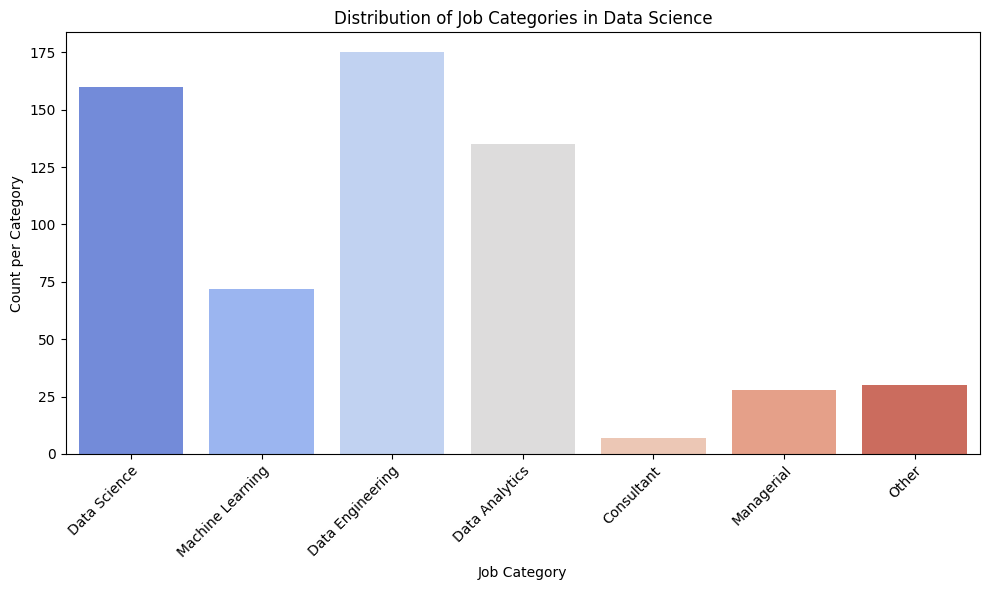

In [281]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=salaries, x="Job_Category", hue="Job_Category", palette='coolwarm', ax=ax)
ax.set(title="Distribution of Job Categories in Data Science",
       xlabel="Job Category",
       ylabel="Count per Category")
# Rotate x-axis labels using the OOP approach
ax.tick_params(axis='x', labelrotation=45)
ax.set_xticklabels(ax.get_xticklabels(), ha='right', rotation_mode='anchor')
plt.tight_layout()
plt.show()

### Finding the number of unique values
You would like to practice some of the categorical data manipulation and analysis skills that you've just seen. To help identify which data could be reformatted to extract value, you are going to find out which non-numeric columns in the planes dataset have a large number of unique values.

In [282]:
# Filter the DataFrame for object columns
non_numeric = planes.select_dtypes("object")
# Loop through columns
for column in non_numeric.columns:
    # Print the number of unique values
    print(f"Number of unique values in {column} column: ", non_numeric[column].nunique())

Number of unique values in Airline column:  8
Number of unique values in Date_of_Journey column:  44
Number of unique values in Source column:  5
Number of unique values in Destination column:  6
Number of unique values in Route column:  122
Number of unique values in Dep_Time column:  218
Number of unique values in Arrival_Time column:  1200
Number of unique values in Duration column:  362
Number of unique values in Total_Stops column:  5
Number of unique values in Additional_Info column:  9
Number of unique values in Additional_Info_Category column:  2


### Flight duration categories
As you saw, there are 362 unique values in the `"Duration"` column of planes. Calling `planes["Duration"].head()`, we see the following values:

```
0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object`
```

Looks like this won't be simple to convert to numbers. However, you could categorize flights by duration and examine the frequency of different flight lengths!

You'll create a `"Duration_Category"` column in the planes DataFrame. Before you can do this you'll need to create a list of the values you would like to insert into the DataFrame, followed by the existing values that these should be created from.

In [283]:
planes["Duration"].head()

0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object

In [284]:
# Create a list of categories
flight_categories = ["Short-haul", "Medium", "Long-haul"]

# Create short-haul values
short_flights = "^0h|^1h|^2h|^3h|^4H"

# Create medium-haul values
medium_flights = "^5h|^6h|^7h|^8h|^9h"

# Create long-haul values
long_flights = "10h|11h|12h|13h|14h|15h|16h"

### Adding duration categories
Now that you've set up the categories and values you want to capture, it's time to build a new column to analyze the frequency of flights by duration!

The variables `flight_categories`, `short_flights`, `medium_flights`, and long_flights that you previously created are available to you.

Create conditions, a list containing subsets of planes
`["Duration"]` based on `short_flights`, `medium_flights`, and `long_flights`.

Each condition is a boolean Series indicating whether the `'Duration'` string contains the specified patterns.



In [285]:
conditions = [
    (planes["Duration"].str.contains(short_flights)),
    (planes["Duration"].str.contains(medium_flights)),
    (planes["Duration"].str.contains(long_flights))
]

Create the `"Duration_Category"` column using `np.select()`.

`np.select(conditions, choicelist, default)` assigns values from choicelist based on the corresponding condition being True.

`conditions`: A list of boolean arrays or Series.

`choicelist`: A list of values to be assigned based on the conditions.

`default`: The value to assign when none of the conditions are met.

In [286]:
planes["Duration_Category"] = np.select(conditions,
                                        flight_categories,
                                        default="Extreme duration")

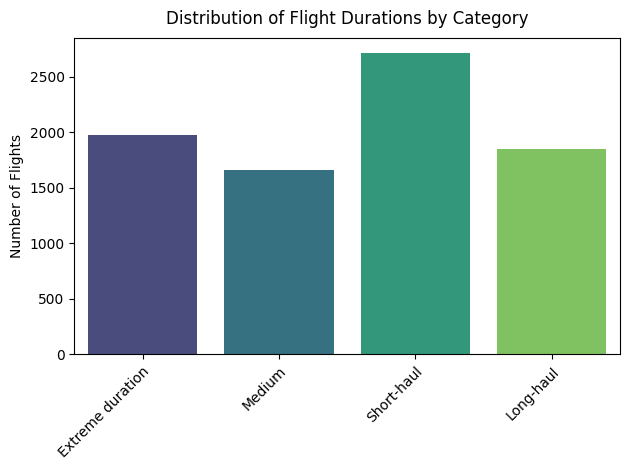

In [287]:
# Create a plot showing the count of each category.
fig, ax = plt.subplots()

# Use seaborn's countplot to visualize the frequency of each 'Duration_Category'.
sns.countplot(data=planes, x="Duration_Category", hue="Duration_Category", palette="viridis")

# Set the title for the x-axis.
ax.set_title("Distribution of Flight Durations by Category", fontsize=12, pad=10, loc="center")

# Set the label for the x-axis to an empty string.
ax.set_xlabel("")

# Set the label for the y-axis and its font size.
ax.set_ylabel("Number of Flights", fontsize=10)

# Rotate the x-axis labels for better readability, especially with longer category names.
plt.xticks(
    rotation=45,         # Rotate labels by 45 degrees.
    fontsize=10,          # Set the font size of the labels.
    ha="right",          # Horizontal alignment of the labels.
    rotation_mode="anchor" # Ensure the alignment is maintained after rotation.
)

# Adjust layout to prevent labels from overlapping.
plt.tight_layout()
plt.show()

### Work with numerical data

The original salaries dataset

In [288]:
print(salaries.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Working_Year          607 non-null    int64  
 1   Designation           607 non-null    object 
 2   Experience            607 non-null    object 
 3   Employment_Status     607 non-null    object 
 4   Employee_Location     607 non-null    object 
 5   Company_Size          607 non-null    object 
 6   Remote_Working_Ratio  607 non-null    int64  
 7   Salary_USD            607 non-null    float64
 8   Job_Category          607 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 42.8+ KB
None


### Converting strings to numbers


```
pd.Series.str.replace("characters to remove", "characters to replace them with")
```



```
salaries["Salary_In_Rupees"] = salaries["Salary_In_Rupees"].str.replace("," , "")
```



```
print(salary["Salary_In_Rupees"].head())
```


```
1  20688070.00
2  8674985.00
3  1591390.00
4  11935425.00
5  5729004.00
Name: Satary_In_Rupees, dtype: object
```

Converting strings to numbers
```
salaries["Salary_In_Rupees"] = salaries["Salary_In_Rupees"].astype(float)
```
- 1 Indian Rupee = 0.012 US Dollars

```
salaries["Salary_USD"] = salaries["Salary_In_Rupees"] * 0.012
```


### Adding summary statistics into a DataFrame

In [289]:
salaries.groupby("Company_Size")["Salary_USD"].mean()

Company_Size
L    113857.282828
M    111625.328221
S     74126.313253
Name: Salary_USD, dtype: float64

### Calculate the standard deviation of 'Salary_USD' for each 'Experience' level and add it as a new column.
This is achieved by:
1. Grouping the DataFrame by the `'Experience'` column.
2. Selecting the `'Salary_USD'` column to perform the aggregation on.
3. Using the `.transform()` method with a lambda function `(lambda x: x.std())`.
    - `.transform()` applies a function to each group and returns a Series/DataFrame with the same index as the original DataFrame.
    - The lambda function `x.std()` calculates the standard deviation for each group (each experience level).
    - The result (the standard deviation for each group) is then broadcast back to all rows belonging to that group.

In [290]:
salaries["std_dev"] = salaries.groupby("Experience")["Salary_USD"].transform(lambda x: x.std())

In [291]:
display(salaries[["Experience", "std_dev"]].value_counts())

Experience  std_dev      
Senior      55086.264071     280
Mid         61014.876754     213
Entry       42390.355189      88
Executive   111783.576779     26
Name: count, dtype: int64

Repeating the process for other summary statistics

In [292]:
salaries["median_by_comp_size"] = salaries.groupby("Company_Size")["Salary_USD"].transform(lambda x:x.median())

In [293]:
display(salaries[["Company_Size", "median_by_comp_size"]].value_counts())

Company_Size  median_by_comp_size
M             108076.0               326
L             95483.0                198
S             62064.0                 83
Name: count, dtype: int64

### Flight duration
You would like to analyze the duration of flights, but unfortunately, the `"Duration"` column in the planes DataFrame currently contains string values.

In [294]:
# Print the first five values of the "Duration" column.
display(planes["Duration"].head())

0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object

- Use .str.extract to capture hours and minutes in two separate columns.
- The regex '(?:(\d+)\s*h)?' matches an optional integer followed by 'h';
- '(?:(\d+)\s*m)?' matches an optional integer followed by 'm'.

In [295]:
duration_parts = planes["Duration"].str.extract(r'(?:(\d+)\s*h)?\s*(?:(\d+)\s*m)?')
display(duration_parts)

,0,1
0,19,NaN
1,5,25
2,4,45
3,2,25
4,15,30
...,...,...
10654,2,40
10655,2,30
10656,2,35
10658,2,40


- Replace missing values (`NaN`) with '0'.
- Convert both columns to integer dtype.

In [296]:
hours_series = duration_parts[0].fillna("0").astype(int)
minutes_series = duration_parts[1].fillna("0").astype(int)

- Compute total hours as hours + (minutes / 60.0).


In [297]:
planes["Duration"] = round(hours_series + (minutes_series / 60.0), 2)
display(planes)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Additional_Info_Category,Duration_Category
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19.00,2 stops,No info,13882.0,No info,Extreme duration
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5.42,1 stop,No info,6218.0,No info,Medium
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4.75,1 stop,No info,13302.0,No info,Extreme duration
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2.42,non-stop,No info,3873.0,No info,Short-haul
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15.50,1 stop,In-flight meal not included,11087.0,Other info,Long-haul
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10654,SpiceJet,21/05/2019,Banglore,Delhi,BLR → DEL,05:55,08:35,2.67,non-stop,No check-in baggage included,3257.0,Other info,Short-haul
10655,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2.50,non-stop,No info,4107.0,No info,Short-haul
10656,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2.58,non-stop,No info,4145.0,No info,Short-haul
10658,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2.67,non-stop,No info,12648.0,No info,Short-haul


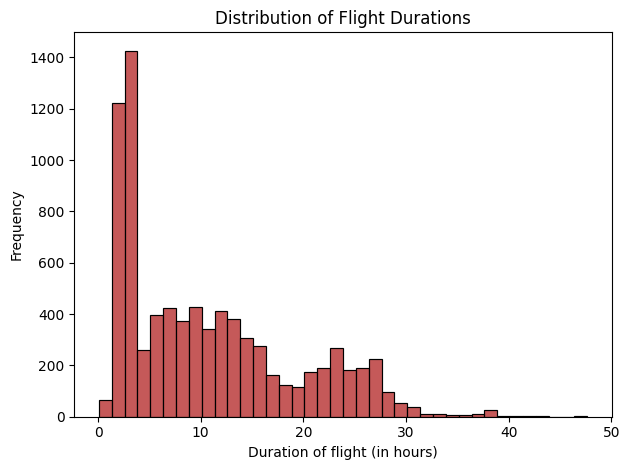

In [298]:
# Plot a histogram of "Duration" values.
fig, ax = plt.subplots()

sns.histplot(x="Duration", data=planes, color="firebrick")
ax.set(title="Distribution of Flight Durations",
       xlabel="Duration of flight (in hours)",
       ylabel="Frequency")
plt.tight_layout()
plt.show()

### Adding descriptive statistics
Now `"Duration"` and `"Price"` both contain numeric values in the planes DataFrame, you would like to calculate summary statistics for them that are conditional on values in other columns.

In [299]:
# Add a column to planes containing the standard deviation of "Price" based on "Airline"
planes["airline_price_st_dev"] = planes.groupby("Airline")["Price"].transform(lambda x:x.std())
print(planes[["Airline", "airline_price_st_dev"]].value_counts())

Airline            airline_price_st_dev
Jet Airways        4189.074664             2964
IndiGo             2218.605260             1585
Air India          3691.028933             1346
Multiple carriers  3516.555826              931
SpiceJet           1799.368945              632
Vistara            2885.765319              362
Air Asia           2000.819195              248
GoAir              2088.432342              140
Name: count, dtype: int64


In [300]:
# Calculate the median for "Duration" by "Airline", storing it as a column called "airline_median_duration"
planes["airline_median_duration"] = planes.groupby("Airline")["Duration"].transform(lambda x:x.median())
print(planes[["Airline","airline_median_duration"]].value_counts())

Airline            airline_median_duration
Jet Airways        13.33                      2964
IndiGo             2.92                       1585
Air India          15.42                      1346
Multiple carriers  10.25                       931
SpiceJet           2.50                        632
Vistara            3.17                        362
Air Asia           2.83                        248
GoAir              2.92                        140
Name: count, dtype: int64


In [301]:
# Find the mean "Price" by "Destination", saving it as a column called "price_destination_mean"
planes["price_destination_mean"] = planes.groupby("Destination")["Price"].transform(lambda x:x.mean())
print(planes[["Destination","price_destination_mean"]].value_counts())

Destination  price_destination_mean
Cochin       10445.639760              3506
Banglore     9103.415154               2204
Delhi        5243.953878                954
New Delhi    11586.150215               699
Hyderabad    5210.531993                547
Kolkata      4921.620805                298
Name: count, dtype: int64


### Handling Outliers

What is an outlier?
An observation far away from other data points
- Median house price: $400,000

- Outlier house price: $5,000,000

Should consider why the value is different:
- Location, number of bedrooms, overall size, etc.

### Using descriptive statistics

In [302]:
display(salaries["Salary_USD"].describe())

count       607.000000
mean     107225.836903
std       67752.393254
min        2730.000000
25%       59893.000000
50%       96982.000000
75%      143225.000000
max      572900.000000
Name: Salary_USD, dtype: float64

###  Using the interquartile range (IQR)

IQR = 75th - 25th percentile

In [303]:
# Extract the salary series
salary_series: pd.Series = salaries["Salary_USD"]

# Compute quartiles
Q1: float = salary_series.quantile(0.25)
median: float = salary_series.median()
Q3: float = salary_series.quantile(0.75)

# Compute the interquartile range
IQR: float = Q3 - Q1

# Identify outliers as those strictly above Q3 + 1.5*IQR (for annotation)
upper_bound: float = Q3 + 1.5 * IQR
outliers: pd.Series = salary_series[salary_series > upper_bound]

### IQR in box plots

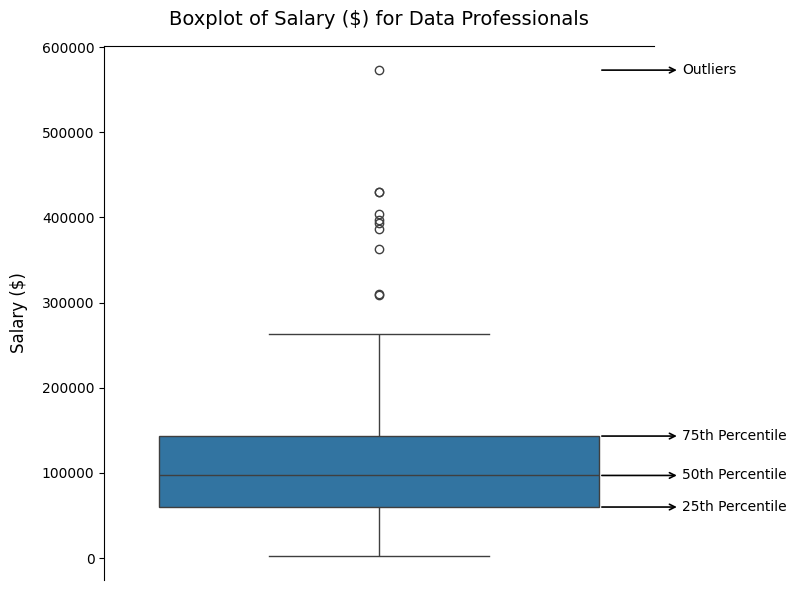

In [304]:
fig, ax = plt.subplots(figsize=(8, 6))

# Create a box plot of the 'Salary_USD' column from the 'salaries' DataFrame.
sns.boxplot(data=salaries, y="Salary_USD", ax=ax)

# Set the title of the plot, including font size and padding.
ax.set_title("Boxplot of Salary ($) for Data Professionals", fontsize=14, pad=15)
# Set an empty string for the x-axis label as it's a single box plot.
ax.set_xlabel("")
# Set the label for the y-axis, indicating the variable being plotted and its unit.
ax.set_ylabel("Salary ($)", fontsize=12, labelpad=10)

# Annotations for statistical measures
# Define the x-coordinate for the annotations, positioned slightly to the right of the box.
x_box = 0.4

# Define keyword arguments for the arrows used in annotations.
arrow_kw = dict(arrowstyle="<-", lw=1.2, color="black")

# Annotate the 25th percentile (Q1).
# xy: The point to annotate (x, y coordinates on the plot).
# xytext: The position of the annotation text.
# textcoords="offset points": Specifies that xytext is an offset from xy.
# va="center", ha="left": Vertical and horizontal alignment of the text.
# arrowprops: Dictionary of arrow properties.
ax.annotate("25th Percentile",
            xy=(x_box, Q1),
            xytext=(60, 0), textcoords="offset points",
            va="center", ha="left",
            arrowprops=arrow_kw)

# Annotate the 50th percentile (Median).
# The median is the middle value of the dataset when sorted.
ax.annotate("50th Percentile",
            xy=(x_box, median),
            xytext=(60, 0), textcoords="offset points",
            va="center", ha="left",
            arrowprops=arrow_kw)

# Annotate the 75th percentile (Q3).
ax.annotate("75th Percentile",
            xy=(x_box, Q3),
            xytext=(60, 0), textcoords="offset points",
            va="center", ha="left",
            arrowprops=arrow_kw)

# Annotate outliers if they exist.
# Outliers are typically defined as values falling below Q1 - 1.5*IQR or above Q3 + 1.5*IQR.
if not outliers.empty:
    top = outliers.max()
    ax.annotate("Outliers",
                xy=(x_box, top),
                xytext=(60, 0), textcoords="offset points",
                va="center", ha="left",
                arrowprops=arrow_kw)

# Set the limits for the x-axis.
ax.set_xlim(-0.5, 0.5)
# Hide the right and bottom spines (borders) of the plot for a cleaner look.
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
# Remove the x-axis ticks as they are not needed for a single box plot.
ax.set_xticks([])

plt.tight_layout()
plt.show()

### Identifying thresholds

In [305]:
# 75th percentile
seventy_fifth = salaries["Salary_USD"].quantile(0.75)

# 25th percentile
twenty_fifth = salaries["Salary_USD"].quantile(0.25)

# Interquartile range
salaries_iqr = seventy_fifth - twenty_fifth

print(salaries_iqr)

83332.0


In [306]:
# Upper threshold
upper = seventy_fifth + (1.5 * salaries_iqr)

# Lower threshold
lower = twenty_fifth - (1.5 * salaries_iqr)

print(upper, lower)

268223.0 -65105.0


### Subsetting our data

In [307]:
salaries[(salaries["Salary_USD"] < lower) | (salaries["Salary_USD"] > upper)][["Experience", "Employee_Location", "Salary_USD"]]

,Experience,Employee_Location,Salary_USD
25,Executive,US,310321.0
33,Mid,US,429675.0
63,Senior,US,393392.0
97,Mid,US,429675.0
157,Mid,US,403895.0
225,Executive,US,397211.0
252,Executive,US,572900.0
482,Executive,US,309366.0
519,Senior,US,362837.0
523,Senior,US,386708.0


### Why look for outliers?

- Outliers are extreme values
*- may not accurately represent our data
- Can change the mean and standard deviation
- Statistical tests and machine learning models need normally distributed data


### What to do about outliers?
- Why do these outliers exist?
-- More senior roles / different countries pay more
-- Consider leaving them in nthe dataset

- Is the data accurate?
-- Could there have been an error in data collection?
-- If so, remove them.



### Dropping outliers

In [308]:
no_outliers = salaries[(salaries["Salary_USD"] > lower) & (salaries["Salary_USD"] < upper)]

In [309]:
print(no_outliers["Salary_USD"].describe())

count       597.000000
mean     102328.480737
std       55910.790653
min        2730.000000
25%       59819.000000
50%       95483.000000
75%      141565.000000
max      263534.000000
Name: Salary_USD, dtype: float64


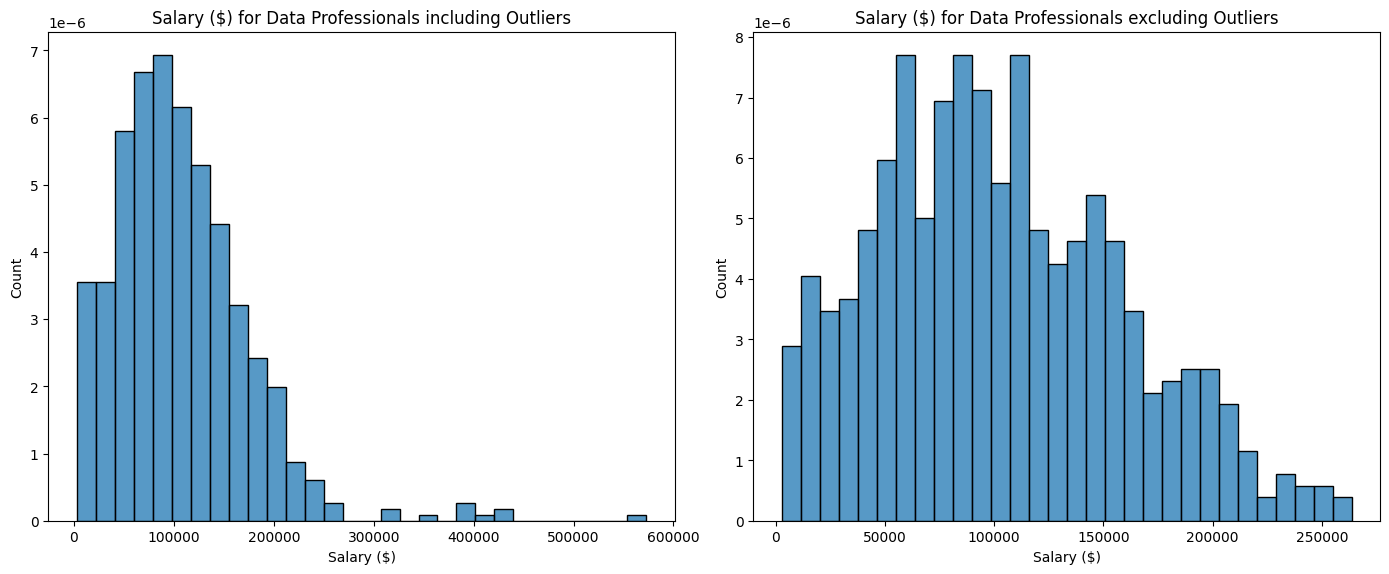

In [310]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

sns.histplot(data=salaries, x="Salary_USD", ax=ax1, stat="density", element="bars", bins=30)
ax1.set(title="Salary ($) for Data Professionals including Outliers",
        xlabel="Salary ($)",
        ylabel="Count")

sns.histplot(data=no_outliers, x="Salary_USD", ax=ax2, stat="density", element="bars", bins=30)
ax2.set(title="Salary ($) for Data Professionals excluding Outliers",
        xlabel="Salary ($)",
        ylabel="Count")

plt.tight_layout()
plt.show()

### Identifying outliers in Flight Prices and Duration
You've proven that you recognize what to do when presented with outliers, but can you identify them using visualizations?

Try to figure out if there are outliers in the `"Price"` or `"Duration"` columns of the planes DataFrame. Visual inspection using histograms can often reveal skewness and potential extreme values.

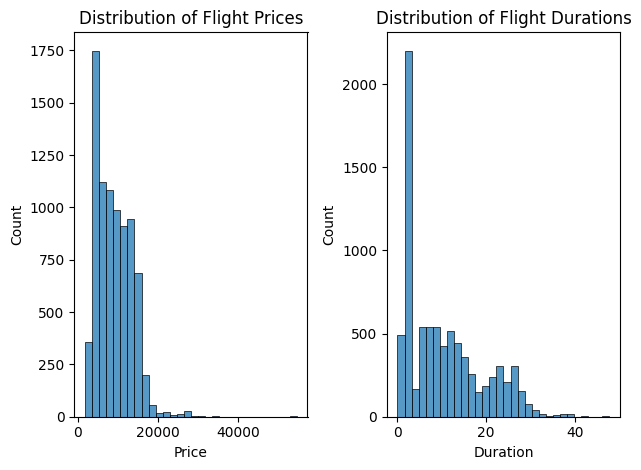

In [311]:
# Plot a histogram of flight prices and duration to visually inspect for outliers
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
sns.histplot(data=planes, x="Price", ax=ax1, bins=30)
ax1.set_title("Distribution of Flight Prices") # Add title for clarity
sns.histplot(data=planes, x="Duration", ax=ax2, bins=30)
ax2.set_title("Distribution of Flight Durations") # Add title for clarity
plt.tight_layout()
plt.show()

### Calculating IQR for Outlier Detection in "Price"

The Interquartile Range (IQR) is a common method for identifying outliers. It measures the spread of the middle 50% of the data.

- **Q1 (25th percentile)**: The value below which 25% of the data falls.
- **Q3 (75th percentile)**: The value below which 75% of the data falls.
- **IQR = Q3 - Q1**

Outliers are typically defined as values that fall below `Q1 - 1.5 * IQR` or above `Q3 + 1.5 * IQR`.

In [312]:
# Calculate the 75th percentile for 'Price'
price_seventy_fifth = planes["Price"].quantile(0.75)
# Calculate the 25th percentile for 'Price'
price_twenty_fifth = planes["Price"].quantile(0.25)

# Calculate the Interquartile Range (IQR) for 'Price'
prices_iqr = price_seventy_fifth - price_twenty_fifth

# Calculate the upper threshold for outlier detection
upper = price_seventy_fifth + (1.5 * prices_iqr)
# Calculate the lower threshold for outlier detection
lower = price_twenty_fifth - (1.5 * prices_iqr)

# Print the calculated thresholds and IQR for transparency
print(f"Upper threshold for Price: {upper}")
print(f"Lower threshold for Price: {lower}")
print(f"IQR for Price: {prices_iqr}")

Upper threshold for Price: 22763.0
Lower threshold for Price: -5293.0
IQR for Price: 7014.0


### Filtering Outliers from "Price"

Once the upper and lower bounds are defined using the IQR method, we can filter the DataFrame to remove rows where the "Price" falls outside these bounds. This helps in creating a dataset that is less influenced by extreme values, which can be beneficial for certain types of analysis or modeling.

In [313]:
planes = planes[(planes["Price"] > lower) & (planes["Price"] < upper)]


### Verifying Price Distribution After Outlier Removal

After removing outliers, it's good practice to check the descriptive statistics of the "Price" column again. We expect to see a more constrained range and potentially a mean value closer to the median if the outliers were significantly skewing the data.

In [314]:
print(planes["Price"].describe())


count     8141.000000
mean      8872.072718
std       4002.453551
min       1759.000000
25%       5224.000000
50%       8372.000000
75%      12121.000000
max      22270.000000
Name: Price, dtype: float64


In [315]:
# Display descriptive statistics for the 'Price' column after outlier removal
# This helps to understand the impact of the outlier removal process on the distribution of 'Price'.
print(planes["Price"].describe())
# Filter the DataFrame to keep only rows where 'Price' is within the calculated lower and upper bounds
# This removes potential outliers based on the IQR method.
planes = planes[(planes["Price"] >= lower) & (planes["Price"] <= upper)]

# Check the shape of the DataFrame after outlier removal to see how many rows were affected
print(f"Shape after outlier removal: {planes.shape}")


count     8141.000000
mean      8872.072718
std       4002.453551
min       1759.000000
25%       5224.000000
50%       8372.000000
75%      12121.000000
max      22270.000000
Name: Price, dtype: float64
Shape after outlier removal: (8141, 16)


## Relationships in Data
Variables in datasets don't exist in a vacuum; they have relationships with each other. In this chapter, you'll look at relationships across numerical, categorical, and even DateTime data, exploring the direction and strength of these relationships as well as ways to visualize them.

### Patterns over time

In [316]:
divorce = pd.read_csv("data/divorce.csv")
divorce.head()

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN


### Importing DateTime data
- DateTime data needs to be explicitly declared to Pandas
- Use `pd.to_datetime()` to convert strings to DateTime objects
- Use or `parse_dates` to load DateTime data from a CSV file

In [317]:
divorce.dtypes

divorce_date          object
dob_man               object
education_man         object
income_man           float64
dob_woman             object
education_woman       object
income_woman         float64
marriage_date         object
marriage_duration    float64
num_kids             float64
dtype: object

In [318]:
divorce = pd.read_csv("data/divorce.csv", parse_dates=["divorce_date", "marriage_date", "dob_man", "dob_woman"])
divorce.dtypes

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object

In [319]:
# pd.to_datetime() converts arguments to DateTime data
divorce["marriage_date"] = pd.to_datetime(divorce["marriage_date"])
divorce.dtypes

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object

In [320]:
divorce.head(2)

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN


### Alternative approach for separate date columns
If we had separate columns for month, day, and year (e.g., `month`, `day`, `year`), we could combine them into a single DateTime column using `pd.to_datetime()` with a list of column names:

In [321]:
# divorce["marriage_date"] = pd.to_datetime(divorce[["month", "day", "year"]])
# divorce.head(2)

### Creating DateTime data
Extract parts of a full date using `dt.month`, `dt.day`, and `dt.year` attributes


In [322]:
divorce["marriage_month"] = divorce["marriage_date"].dt.month
divorce.head()


,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids,marriage_month
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0,6
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN,9
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0,2
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN,5
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN,8


### Visualizing patterns over time


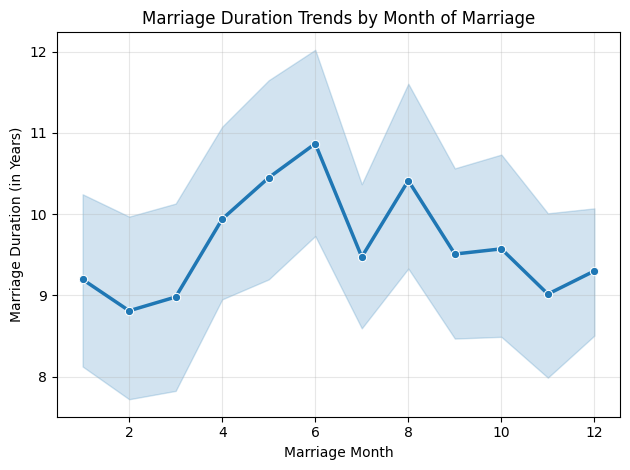

In [323]:
fig, ax = plt.subplots()
sns.lineplot(data=divorce, x="marriage_month", y="marriage_duration", marker='o', linewidth=2.5, ax=ax)
ax.set(title="Marriage Duration Trends by Month of Marriage",
       xlabel="Marriage Month", 
       ylabel="Marriage Duration (in Years)")
# Add grid for better readability
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [326]:
# Define the marriage_year column
divorce["marriage_year"] = divorce["marriage_date"].dt.year

Create a line plot showing the average number of kids a couple had during their marriage, arranged by the year that the couple got married.

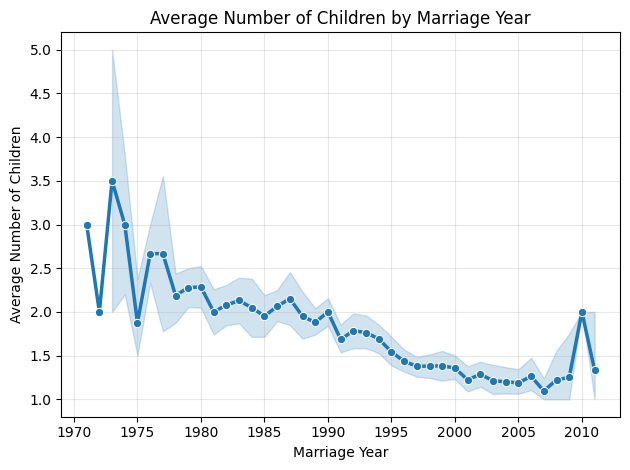

In [329]:
fig, ax = plt.subplots()

sns.lineplot(data=divorce, x="marriage_year", 
             y="num_kids", marker ='o', linewidth=2.5, ax=ax)
ax.set(title="Average Number of Children by Marriage Year", 
       xlabel="Marriage Year", 
       ylabel="Average Number of Children")

ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Correlation

- Describes direction and strength of relationship between two variables
- Can help us use variables to predict future outcomes 

In [332]:
divorce.select_dtypes(include='number').corr().round(3)

,income_man,income_woman,marriage_duration,num_kids,marriage_month,marriage_year
income_man,1.000,0.318,0.085,0.041,0.014,0.019
income_woman,0.318,1.000,0.079,-0.018,0.041,0.026
marriage_duration,0.085,0.079,1.000,0.447,0.001,-0.812
num_kids,0.041,-0.018,0.447,1.000,-0.001,-0.461
marriage_month,0.014,0.041,0.001,-0.001,1.000,-0.011
marriage_year,0.019,0.026,-0.812,-0.461,-0.011,1.000


- `.corr()` calculates Pearson correlation coefficient, measuring linear relationship

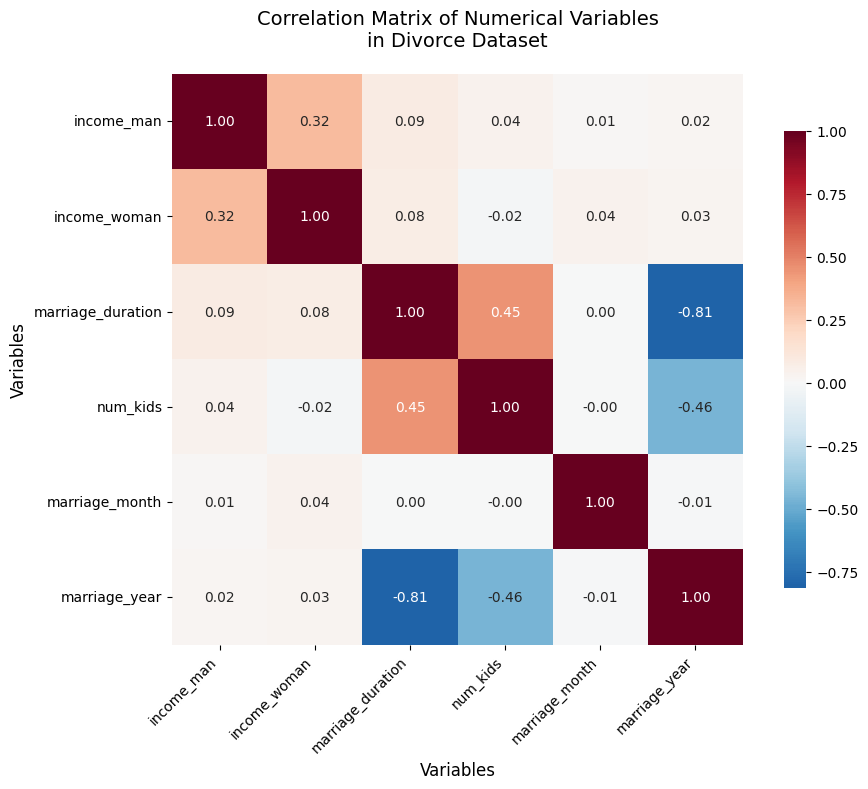

In [343]:
fig, ax = plt.subplots(figsize=(10, 8))
correlation_matrix = divorce.select_dtypes(include='number').corr()

sns.heatmap(correlation_matrix, 
            annot=True, 
            center=0,
            cmap='RdBu_r',
            square=True,
            fmt='.2f',
            cbar_kws={'shrink': 0.8},
            ax=ax)

ax.set_title('Correlation Matrix of Numerical Variables\nin Divorce Dataset', 
             fontsize=14, pad=20)
ax.set_xlabel('Variables', fontsize=12)
ax.set_ylabel('Variables', fontsize=12)

# Rotate labels for better readability
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

### Correlation in context

In [344]:
divorce["divorce_date"].min()

Timestamp('2000-01-08 00:00:00')

In [345]:
divorce["divorce_date"].max()

Timestamp('2015-11-03 00:00:00')

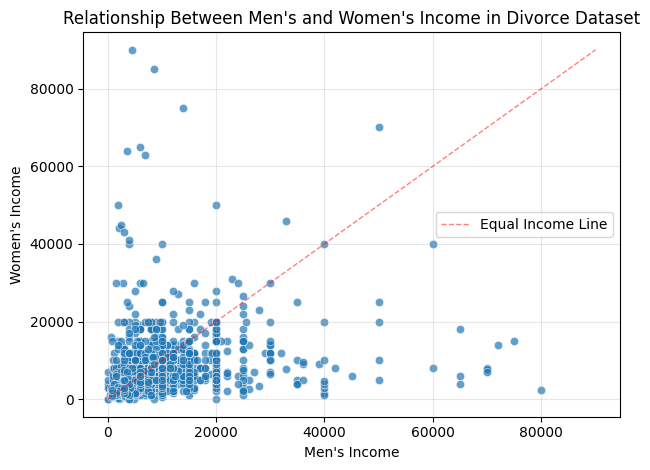

In [347]:
fig, ax = plt.subplots()

sns.scatterplot(data=divorce, x="income_man", y="income_woman", alpha=0.7, ax=ax)
ax.set(title="Relationship Between Men's and Women's Income in Divorce Dataset",
    xlabel="Men's Income",
    ylabel="Women's Income")

# Add a diagonal reference line to show income equality
min_income = min(divorce["income_man"].min(), divorce["income_woman"].min())
max_income = max(divorce["income_man"].max(), divorce["income_woman"].max())
ax.plot([min_income, max_income], [min_income, max_income], 
     'r--', alpha=0.5, linewidth=1, label='Equal Income Line')

ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Pairplots

This one is very difficult to interpret

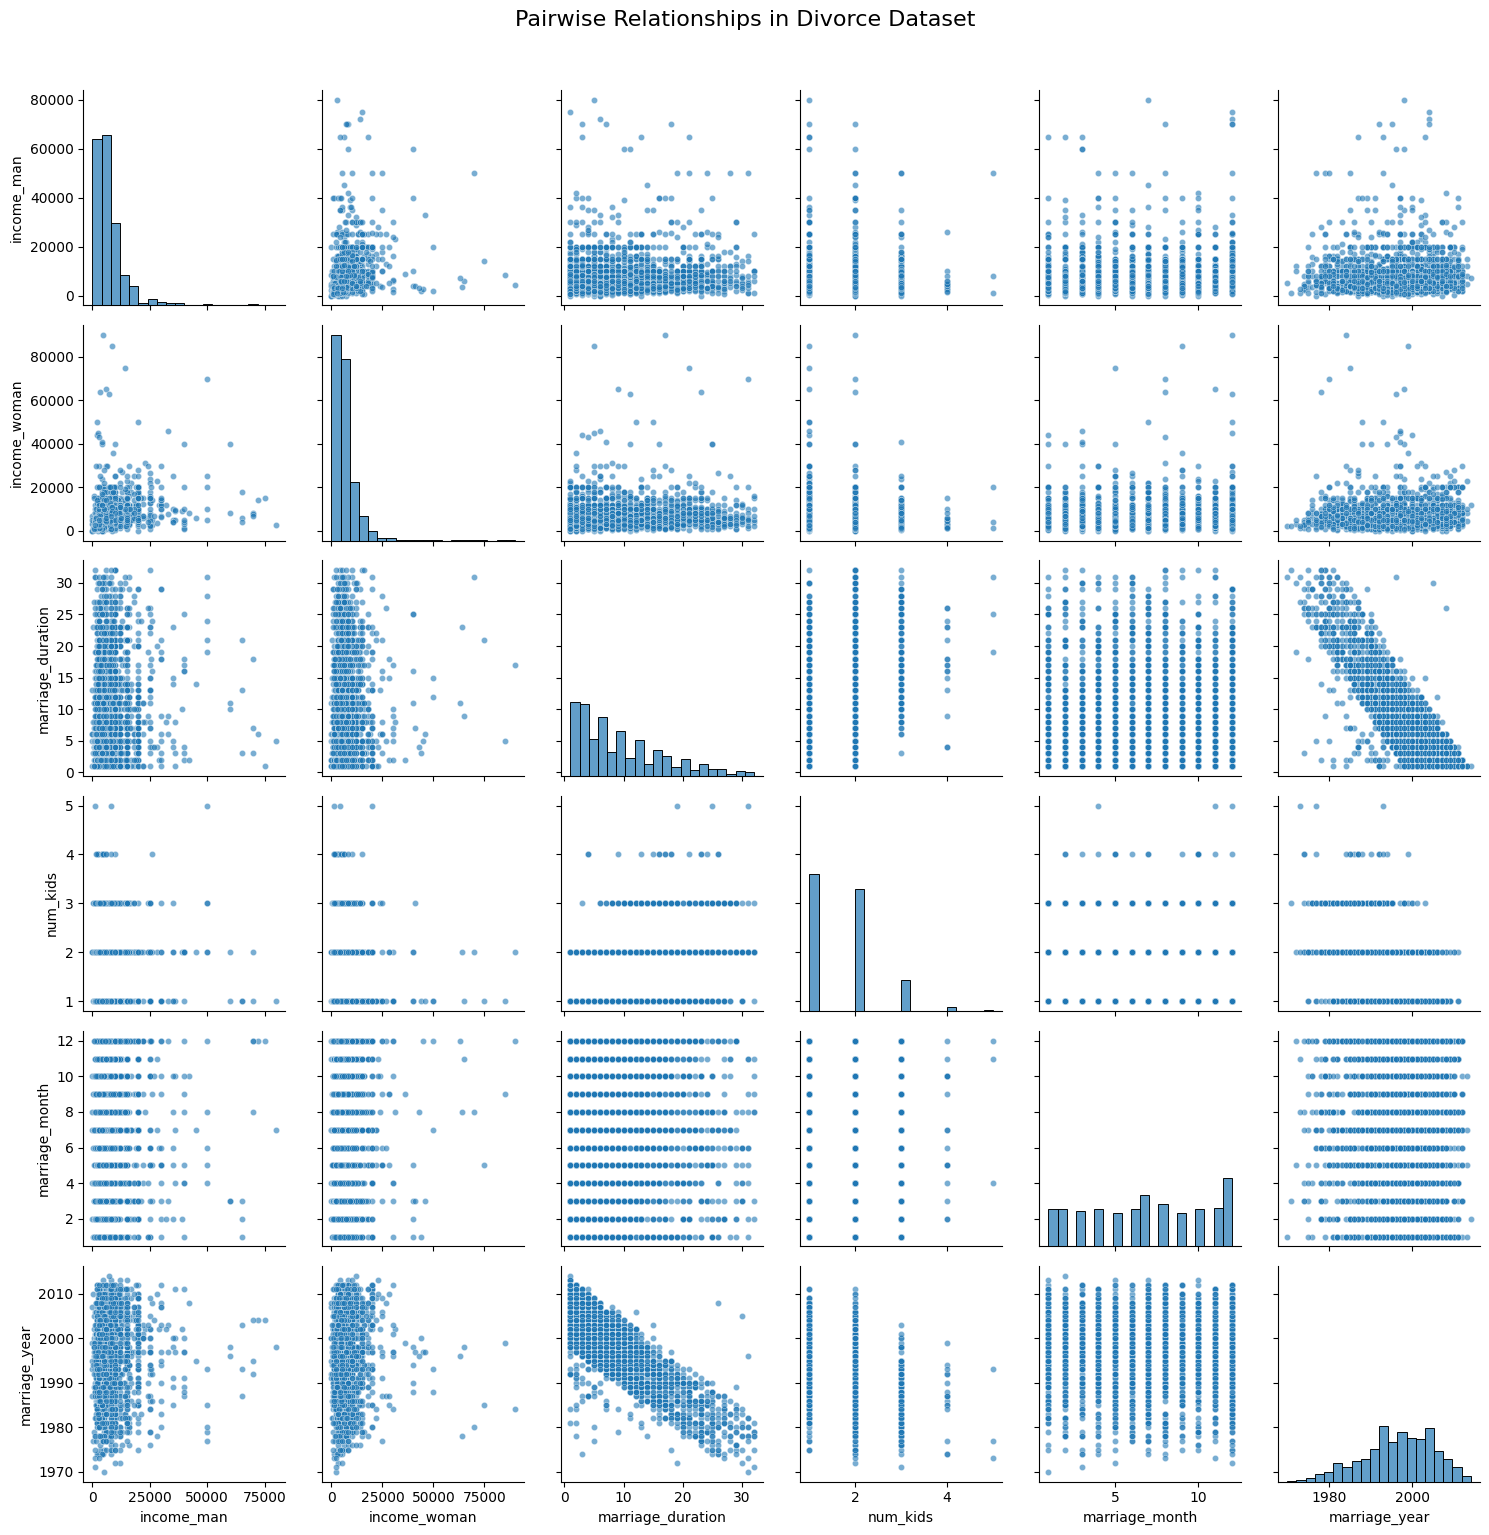

In [349]:
# Create a pairplot to visualize relationships between all numerical variables
g = sns.pairplot(data=divorce, 
                 diag_kind='hist',  # Use histograms on diagonal
                 plot_kws={'alpha': 0.6, 's': 20},  # Make scatter points semi-transparent and smaller
                 diag_kws={'bins': 20, 'alpha': 0.7})  # Customize histogram bins and transparency

# Add a main title to the entire figure
g.fig.suptitle('Pairwise Relationships in Divorce Dataset', 
               fontsize=16, y=1.02)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

We can limit the number of plotted relationships by setting the vars argument equal to the variables of interest

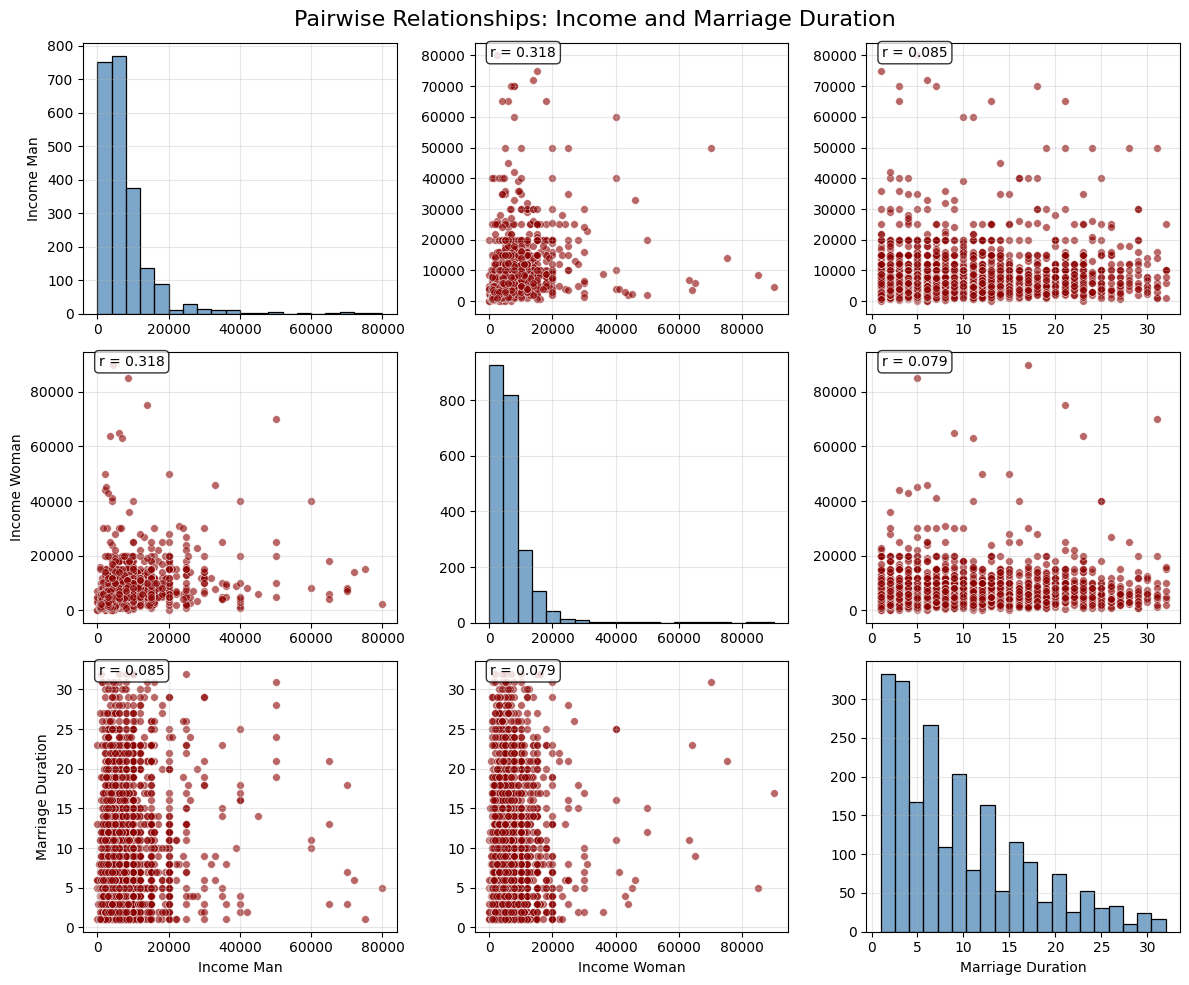

In [353]:
fig, axes = plt.subplots(3, 3, figsize=(12, 10))

# Define the variables we want to plot
vars_to_plot = ["income_man", "income_woman", "marriage_duration"]

# Create custom pairplot
for i, var1 in enumerate(vars_to_plot):
    for j, var2 in enumerate(vars_to_plot):
        ax = axes[i, j]
        
        if i == j:
            # Diagonal: histograms
            sns.histplot(data=divorce, x=var1, bins=20, alpha=0.7, 
                        color='steelblue', ax=ax)
            ax.set_ylabel('Frequency')
        else:
            # Off-diagonal: scatter plots
            sns.scatterplot(data=divorce, x=var2, y=var1, 
                           alpha=0.6, s=30, color='darkred', ax=ax)
            
            # Add correlation coefficient as text
            corr = divorce[var1].corr(divorce[var2])
            ax.text(0.05, 0.95, f'r = {corr:.3f}', 
                   transform=ax.transAxes, fontsize=10,
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        # Customize labels
        if i == len(vars_to_plot) - 1:
            ax.set_xlabel(var2.replace('_', ' ').title())
        else:
            ax.set_xlabel('')
            
        if j == 0:
            ax.set_ylabel(var1.replace('_', ' ').title())
        else:
            ax.set_ylabel('')
        
        # Add grid for better readability
        ax.grid(True, alpha=0.3)

# Add main title
fig.suptitle('Pairwise Relationships: Income and Marriage Duration', 
             fontsize=16, y=0.98)

plt.tight_layout()
plt.show()